In [1]:
#data set

#A
a=[0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1]

#8
b =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 1, 0, 
    0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 1, 0, 
    0, 1, 1, 1, 1, 0]

#C
c =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 1, 1, 1, 0]

In [2]:
#creating labels
y=[[1,0,0],
  [0,1,0],
  [0,0,1]]
     

In [3]:
import numpy as np
import matplotlib.pyplot as plt

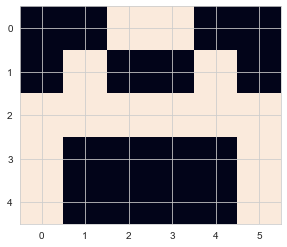

In [4]:
# visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [5]:
#convert data and  labels into numpy array
x=[np.array(a).reshape(1,30),
   np.array(b).reshape(1,30),
   np.array(c).reshape(1,30)]

y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
#input(1,30)
#hidden(1,5)
#output(3,3)

In [7]:
#activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
#creating feed forward NN
def f_forward(x,w1,w2):

    #hidden layer
    z1=x.dot(w1)
    a1=sigmoid(z1)

    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [9]:
#initilaize the weight

def generate_wt(x, y):
    l = []
    for i in range(x * y):
        l.append(np.random.randn())
    return np.array(l).reshape(x, y)


In [10]:
def loss(out,y):
    s=(np.square(out-y))
    s=np.sum(s)/len(y)
    return s

In [11]:
#back propagation
def back_prop(x,y,w1,w2,alpha):

    #hidden layer
    z1=x.dot(w1)
    a1=sigmoid(z1)

    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)

    d2=(a2-y)
    d1=d1=np.multiply(d2.dot(w2.T), np.multiply(a1, 1-a1))

    #gradient`
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)

    w1=w1-(alpha * w1_adj)
    w2=w2-(alpha * w2_adj)

    return w1,w2

In [12]:
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_list = []

    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2) 
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epoch:", j+1, "acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) /len(x)))*100)
        loss_list.append(sum(l) / len(x))
    return acc, loss_list, w1, w2


In [13]:
def predict(x,w1,w2):
    out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if maxm<out[0][i]:
            maxm=out[0][i]
        k=i
        if(k==0):
            print("image is of letter A")
        elif(k==1):
            print("image is of letter B")
        else:
            print("image is of letter C")
            plt.imshow(x.reshape(5,6))
        plt.show()




In [14]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,"\n",w2)

[[ 7.65600784e-01 -3.54689340e-01 -8.19439335e-01  4.84764220e-01
  -1.98960129e-01]
 [-4.48351750e-01 -7.23942379e-01  5.20482783e-01 -5.34488410e-01
  -5.95877227e-04]
 [ 5.91140439e-02 -1.42674897e+00 -7.24249999e-02 -1.21876138e+00
   5.83701843e-01]
 [ 2.91434496e-01 -2.32882109e-01  3.16190986e-01 -5.33226065e-01
  -4.71877220e-01]
 [-6.62368563e-01 -1.86568169e-01 -2.38708012e-01  1.59573658e+00
  -4.88487404e-01]
 [ 1.12372350e+00  1.21490943e+00 -1.71313855e+00 -9.57830941e-01
   1.57849479e+00]
 [ 1.23005061e-01 -9.07265635e-01 -1.19878098e+00 -7.29444745e-01
  -3.79938256e-01]
 [-2.60294351e-01  1.98587836e+00  5.32953293e-01  4.75260163e-01
  -3.11900817e-01]
 [ 3.67447410e-01  1.01240695e-01  6.04911997e-01  1.93313654e+00
  -9.81282353e-01]
 [-8.66364948e-01 -2.61202707e-01 -1.20417603e+00 -1.09908752e+00
   3.84603561e-01]
 [ 1.75585816e+00  4.83292129e-01 -1.07246392e+00 -2.15351701e-01
  -1.03848141e+00]
 [-2.41620537e-01  1.89425584e+00 -6.09034480e-01  7.74101040e-01

In [15]:
acc, loss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epoch: 1 acc: 63.116887252250045
Epoch: 2 acc: 67.0203518160749
Epoch: 3 acc: 70.05988155253786
Epoch: 4 acc: 72.4958843826222
Epoch: 5 acc: 74.5398879543365
Epoch: 6 acc: 76.28044529402096
Epoch: 7 acc: 77.75583464468228
Epoch: 8 acc: 78.99258213144387
Epoch: 9 acc: 80.02055714599288
Epoch: 10 acc: 80.87356030722542
Epoch: 11 acc: 81.58524805672677
Epoch: 12 acc: 82.18575478532073
Epoch: 13 acc: 82.7002065871598
Epoch: 14 acc: 83.14862709515313
Epoch: 15 acc: 83.54653477505957
Epoch: 16 acc: 83.90576042128404
Epoch: 17 acc: 84.23524394112013
Epoch: 18 acc: 84.54171458944181
Epoch: 19 acc: 84.83023374817262
Epoch: 20 acc: 85.10461201604352
Epoch: 21 acc: 85.36772307673156
Epoch: 22 acc: 85.62173743739578
Epoch: 23 acc: 85.86829589196321
Epoch: 24 acc: 86.10863841200522
Epoch: 25 acc: 86.34370033129305
Epoch: 26 acc: 86.57418456254464
Epoch: 27 acc: 86.80061619430828
Epoch: 28 acc: 87.02338405441148
Epoch: 29 acc: 87.24277255538078
Epoch: 30 acc: 87.45898622999036
Epoch: 31 acc: 87.6721

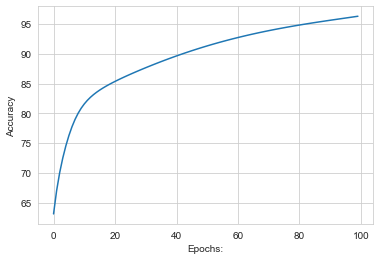

In [16]:
import matplotlib.pyplot as plt

# plotting accuracy
plt.plot(acc)
plt.ylabel("Accuracy")  # Corrected typo here
plt.xlabel("Epochs:")   # Corrected typo here
plt.show()


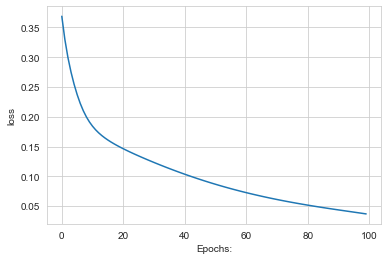

In [17]:

#plotting accuracy

plt.plot(loss)
plt.ylabel("loss")
plt.xlabel("Epochs:")
plt.show()

In [18]:
print(w1,"\n",w2)

[[ 0.76560078 -0.35468934 -0.81943933  0.48476422 -0.19896013]
 [-0.55705397 -0.60657484  0.48372881 -0.21222187 -0.33239927]
 [-0.07938598 -1.0381294  -0.26318987 -1.27118422  0.72005147]
 [ 0.15293447  0.15573746  0.12542612 -0.58564891 -0.33552759]
 [-0.77107078 -0.06920063 -0.27546198  1.91800312 -0.8202908 ]
 [ 1.1237235   1.21490943 -1.71313855 -0.95783094  1.57849479]
 [ 0.12300506 -0.90726564 -1.19878098 -0.72944475 -0.37993826]
 [-0.39879437  2.37449793  0.34218842  0.42283732 -0.17555119]
 [ 0.36744741  0.1012407   0.604912    1.93313654 -0.98128235]
 [-0.86636495 -0.26120271 -1.20417603 -1.09908752  0.38460356]
 [ 2.26743278  0.73918369 -1.2932509  -0.39539658 -0.71738436]
 [-0.24162054  1.89425584 -0.60903448  0.77410104  0.66154882]
 [-0.25856193  1.48765895 -1.13379385  0.8247636  -0.39798195]
 [-0.26442394  0.62192679 -0.34883512 -1.13332426 -0.54166355]
 [ 1.71326975 -0.60063143 -1.25324485 -0.01041529  1.1923697 ]
 [ 1.08771667  0.82318041  1.46591235  0.92456473  0.61

image is of letter A
image is of letter B
image is of letter C


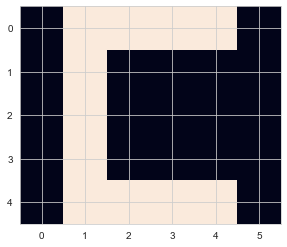

In [19]:
predict(x[2],w1,w2)

image is of letter A
image is of letter B
image is of letter C


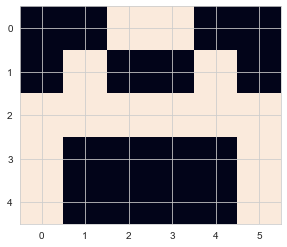

In [20]:
predict(x[0],w1,w2)